# Titanic Dataset Kaggle

https://www.kaggle.com/competitions/titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Abrindo e entendendo os dados

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Lendo os nossos dados
dados = pd.read_csv('drive/MyDrive/Datasets/titanic_train.csv')

In [ ]:
# Qual a "cara" dos nossos dados?
print(dados.head())

In [ ]:
# Qual o "tamanho" do dataset?
print(dados.shape)

In [ ]:
# Quantos dos dados são nulos (NaN)?
print(dados.isna().sum())

In [ ]:
# Quais os tipos dos dados?
print(dados.info())

In [ ]:
# E as estatísticas?
print(dados.describe())

In [ ]:
# Quantos valores diferentes temos na coluna "Survived"?
print(dados.Survived.nunique())

for col in dados:
  print(col, dados[col].nunique())

In [ ]:
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  print(col, dados[col].unique())

### Descrição das colunas

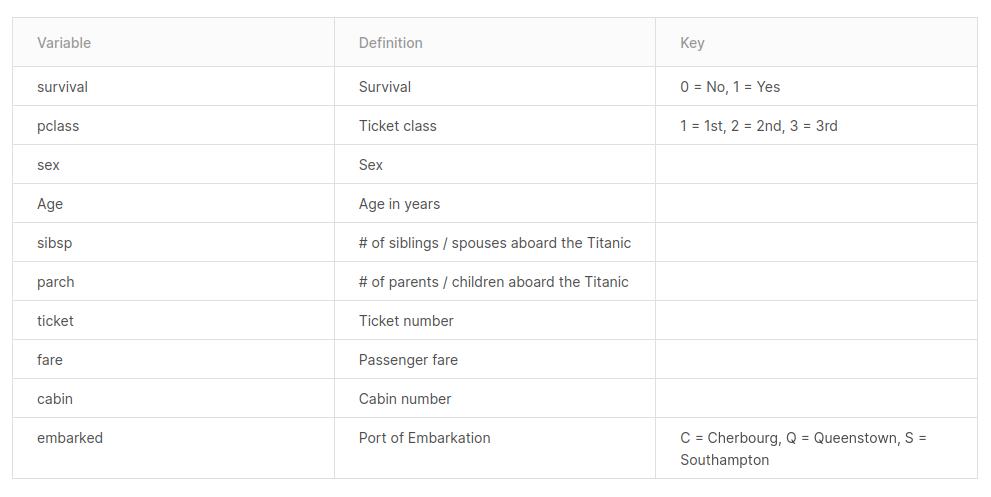

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Gráficos

In [ ]:
# Quantas pessoas sobreviveram no nosso dataset?
# Survived = 0 -> Não sobreviveu
# Survived = 1 -> Sobreviveu
print(dados.Survived.value_counts())

print() # Somente para pular uma linha

f, ax = plt.subplots(1, 2, figsize=(18,8))
dados.Survived.value_counts().plot.pie(explode=[0,.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=dados,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
# Qual o gênero dos passageiros?
print(dados.Sex.value_counts())
print()

sns.countplot(data=dados, x='Sex')
plt.show()

In [ ]:
### Qual a distribuição de idades? ###

print(dados.Age.describe())
# print()

# plt.figure(figsize=(20,8))
sns.histplot(data=dados, x="Age") # kde=True # binwidth
plt.show()

> "Mulheres e crianças primeiro!"

Será?

In [ ]:
agrupado = dados.groupby(['Sex', 'Survived']).Survived.count()

print(agrupado)
print()

f, ax = plt.subplots(1, 2, figsize=(18,8))
(dados[['Sex','Survived']].groupby(['Sex']).mean() * 100).plot.bar(ax=ax[0])
ax[0].set_title('Percentual de sobreviventes por gênero (%)')
sns.countplot(data=dados,x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Sobreviventes por gênero')
plt.show()

In [ ]:
dados_ext = dados.copy()
faixa_etaria = dados['Age'].map(
    lambda age: '0-10' if age < 10 else '10-20' if age < 20 else '20-30' if age < 30 else '30-40' if age < 40 else '40+' if age < 100 else age
    )
dados_ext['faixa_etaria'] = faixa_etaria

print(dados_ext)


In [ ]:
dados_ext.groupby(['faixa_etaria']).Survived.mean().plot.bar() # Sex

In [ ]:
## O que aconteceu com o passageiro mais velho?
# print(dados[dados.Age == dados.Age.max()])

## E com o mais novo?
# print(dados[dados.Age == dados.Age.min()])

In [ ]:
pd.crosstab(dados.Pclass,dados.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dados['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=dados,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


In [ ]:
pd.crosstab([dados.Sex,dados.Survived],dados.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=dados,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=dados,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()